In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')

In [2]:
#Sentinel 2, Band 08 Results

In [3]:
arr = np.load('./b084532.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

In [4]:
ip = np.load('../namelist/b08.npy')
ip4532 = ip[:, 45, 32]
ip2516 = ip[:, 25, 16]
df = pd.read_pickle('../namelist/s2_08.pkl')
df['start_datetime'] = pd.to_datetime(df['start_datetime'])
df4532 = {'ds':df['start_datetime'],'y':ip4532}
df4532 = pd.DataFrame(df4532)
df4532 = df4532[df4532['y']!=0.0]
df2516 = {'ds':df['start_datetime'],'y':ip2516}
df2516 = pd.DataFrame(df2516)
df2516 = df2516[df2516['y']!=0.0]

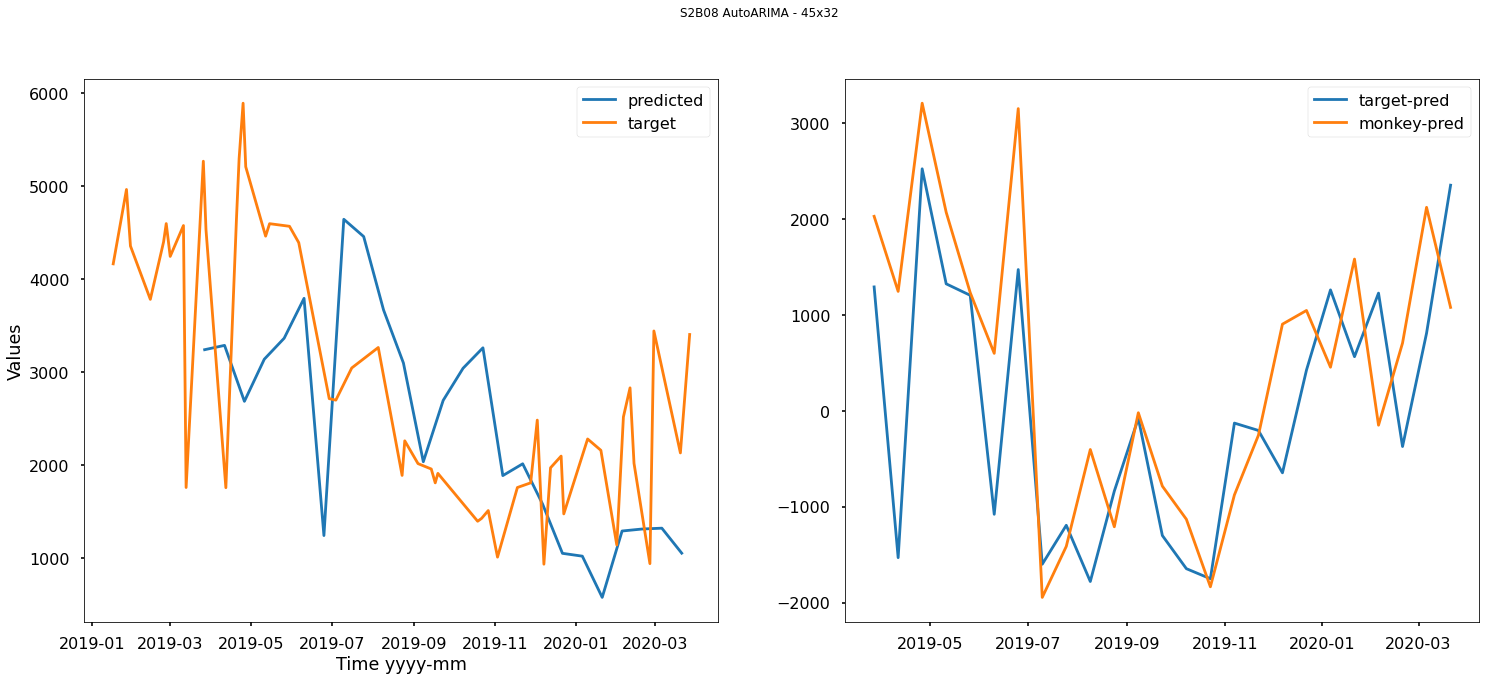

In [5]:
df = df4532[df4532['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
fig.suptitle('S2B08 AutoARIMA - 45x32')
ax1.legend()
plt.show()
plt.close()

In [6]:
arr = np.load('./b082516.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

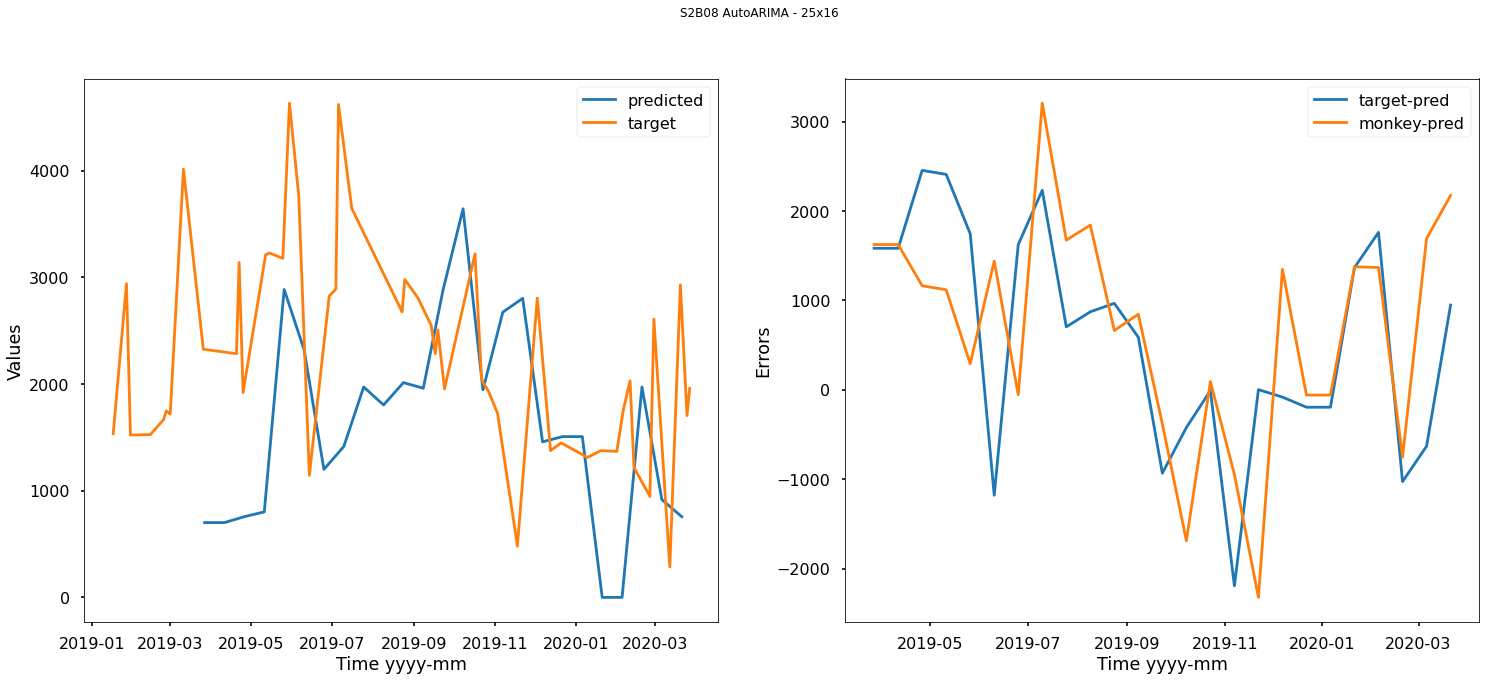

In [7]:
df = df2516[df2516['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
fig.suptitle('S2B08 AutoARIMA - 25x16')
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
ax1.set_xlabel('Time yyyy-mm')
ax1.set_ylabel('Errors')
ax1.legend()
plt.show()
plt.close()

In [8]:
#Sentinel 1 without seperation

In [9]:
arr = np.load('./s1_4532.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

In [10]:
df = pd.read_pickle('../namelist/s1_alltime.pkl')
df['start_datetime'] = pd.to_datetime(df['start_datetime'])
date = sorted(list(set(df['start_datetime'].values)))
#date = pd.DataFrame(date)
ip = np.load('../namelist/s1_alltime.npy')
ip4532 = ip[:, 45, 32]
ip2516 = ip[:, 25, 16]
df4532 = {'ds':date,'y':ip4532}
df4532 = pd.DataFrame(df4532)
df4532 = df4532[df4532['y']!=255]
df2516 = {'ds':date,'y':ip2516}
df2516 = pd.DataFrame(df2516)
df2516 = df2516[df2516['y']!=255]

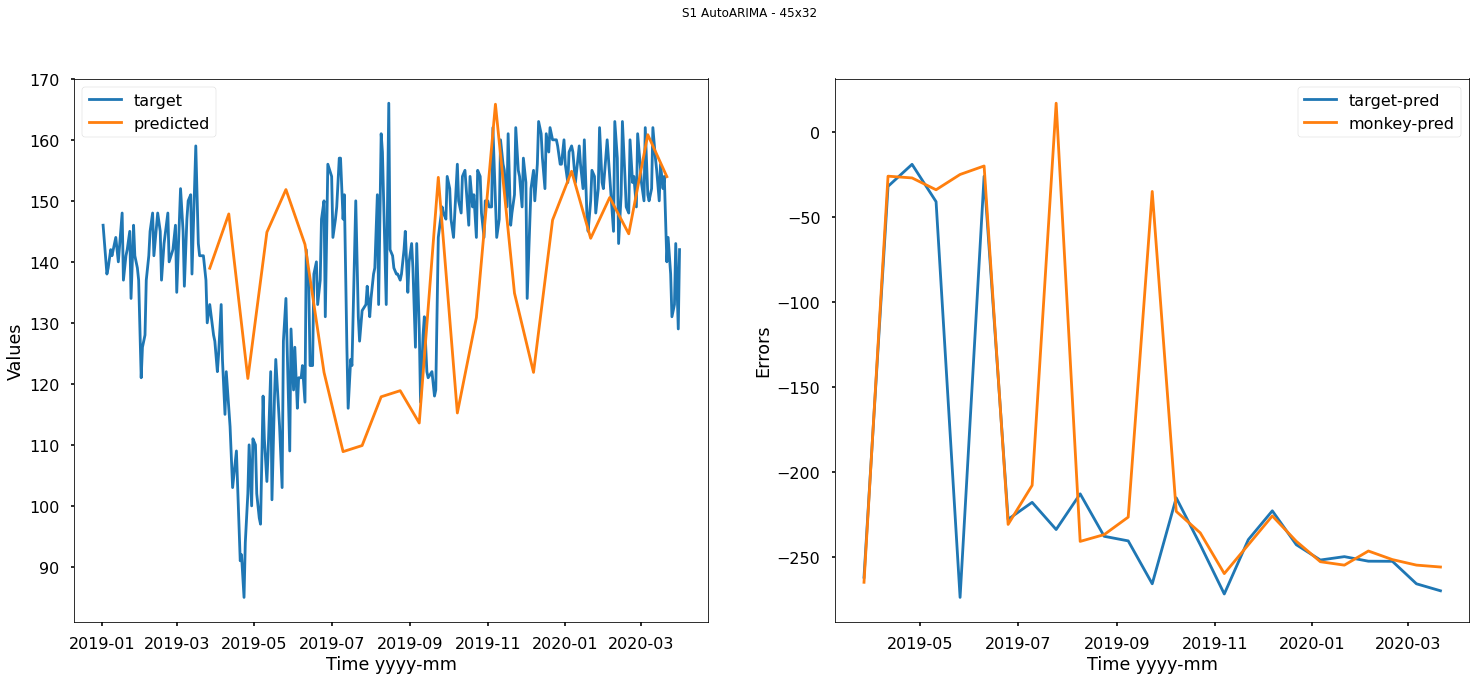

In [11]:
df = df4532[df4532['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
fig.suptitle('S1 AutoARIMA - 45x32')
ax1.set_xlabel('Time yyyy-mm')
ax1.set_ylabel('Errors')
ax1.legend()
plt.show()
plt.close()

In [12]:
arr = np.load('./s1_2516.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

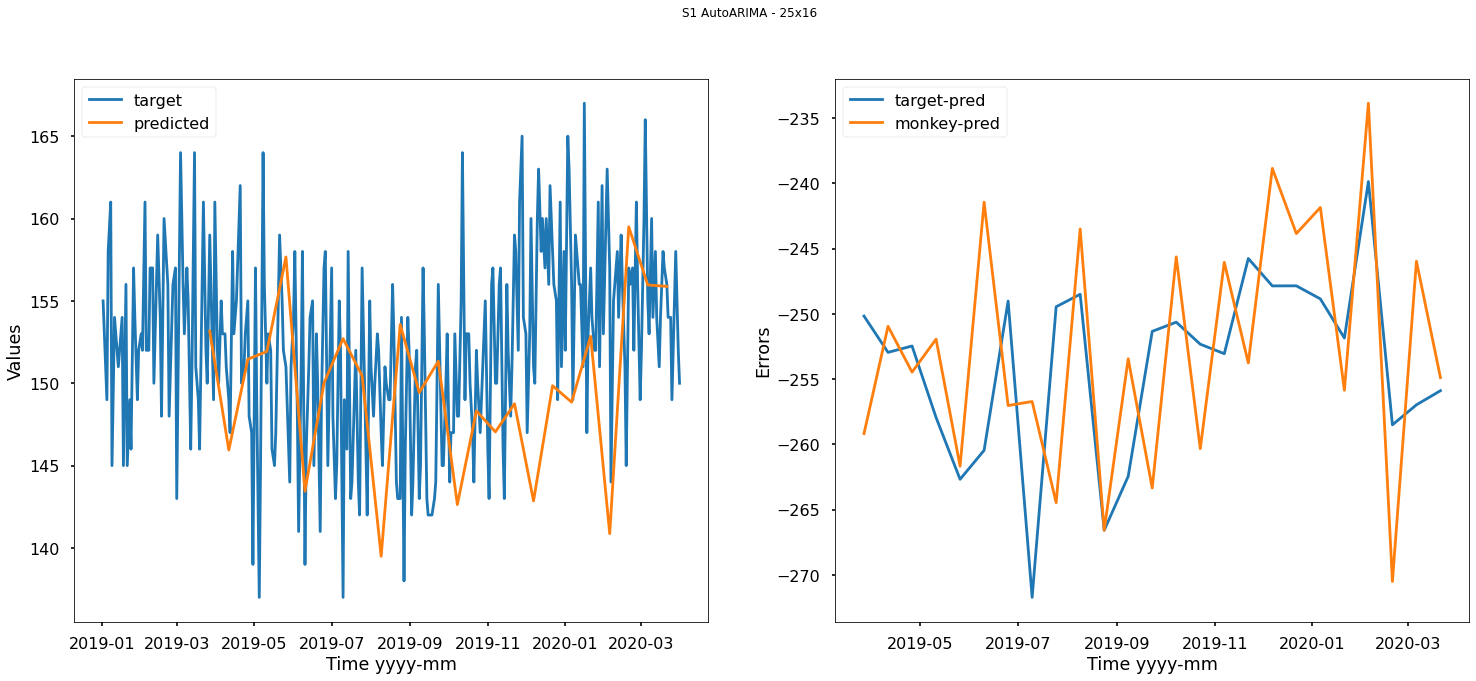

In [13]:
df = df2516[df2516['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
fig.suptitle('S1 AutoARIMA - 25x16')
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
ax1.set_xlabel('Time yyyy-mm')
ax1.set_ylabel('Errors')
ax1.legend()
plt.show()
plt.close()

In [14]:
#Sentinel 1 Ascending

In [15]:
arr = np.load('./s1asc_4532.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

In [16]:
df = pd.read_pickle('../namelist/s1_dates_a.pkl')
df['start_datetime'] = pd.to_datetime(df[0])
df.sort_index(inplace=True)
#df['start_datetime'] = pd.to_datetime(df['start_datetime'])
date = sorted(list(set(df['start_datetime'].values)))
#date = pd.DataFrame(date)
ip = np.load('../namelist/s1_dates_a.npy')
#ip = np.swapaxes(ip,0,2)
ip4532 = ip[:, 45, 32]
ip2516 = ip[:, 25, 16]
df4532 = {'ds':date,'y':ip4532}
df4532 = pd.DataFrame(df4532)
df4532 = df4532[df4532['y']!=255]
df2516 = {'ds':date,'y':ip2516}
df2516 = pd.DataFrame(df2516)
df2516 = df2516[df2516['y']!=255]

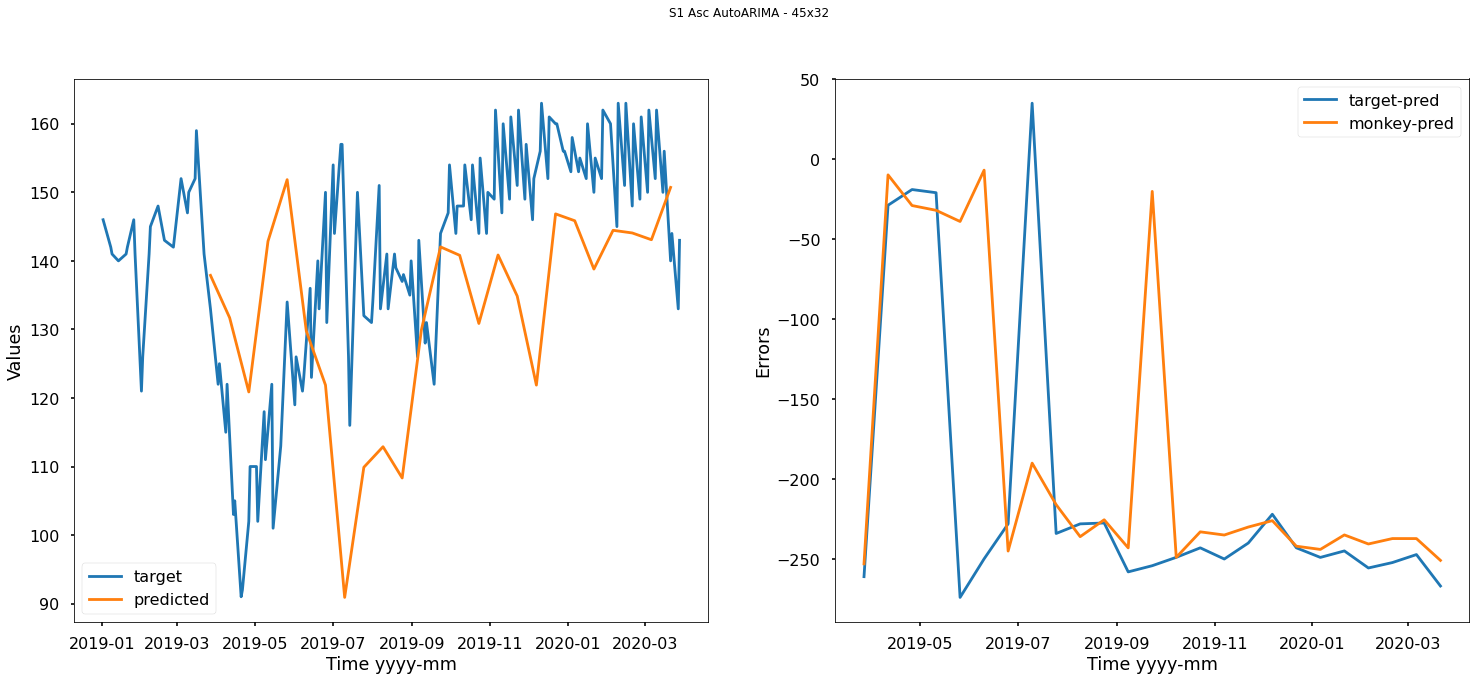

In [17]:
df = df4532[df4532['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
fig.suptitle('S1 Asc AutoARIMA - 45x32')
ax1.set_xlabel('Time yyyy-mm')
ax1.set_ylabel('Errors')
ax1.legend()
plt.show()
plt.close()

In [18]:
arr = np.load('./s1asc_2516.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

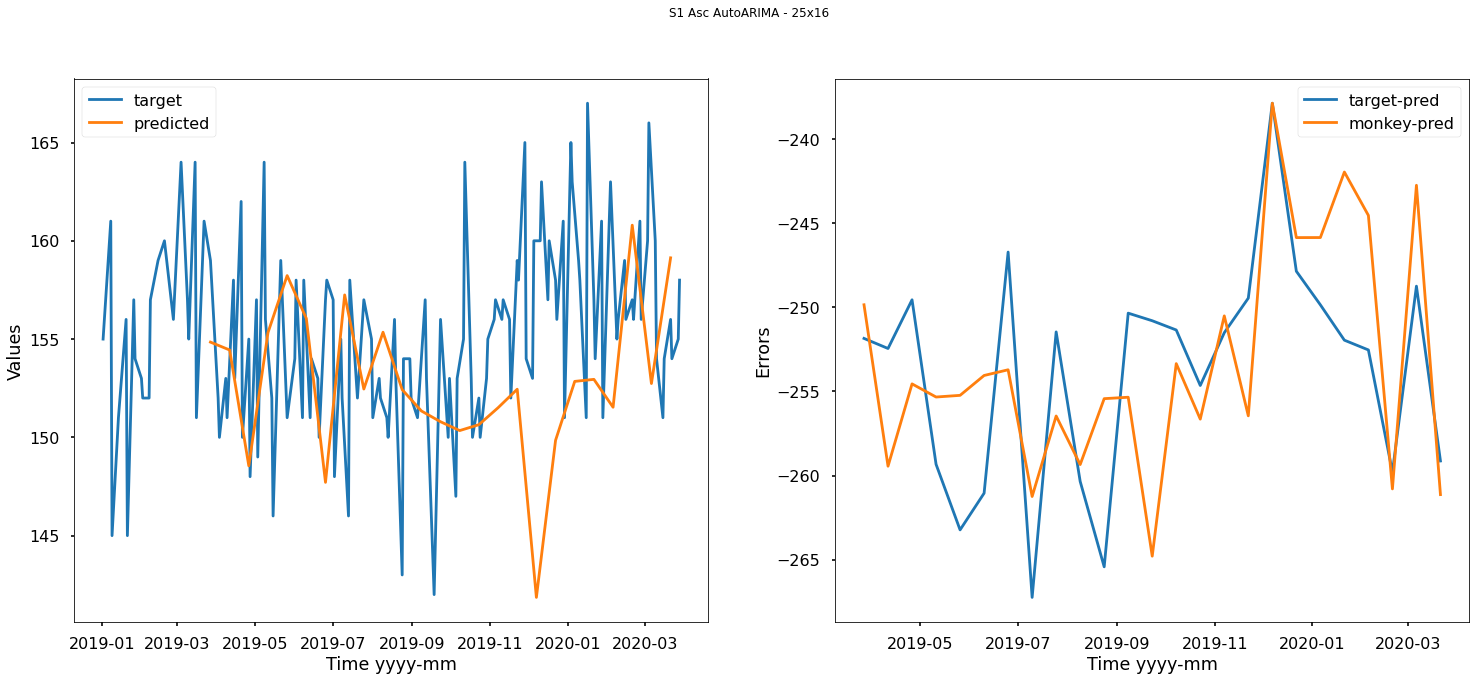

In [19]:
df = df2516[df2516['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
fig.suptitle('S1 Asc AutoARIMA - 25x16')
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
ax1.set_xlabel('Time yyyy-mm')
ax1.set_ylabel('Errors')
ax1.legend()
plt.show()
plt.close()

In [20]:
#Sentinel 1 Descending

In [21]:
arr = np.load('./s1dsc_4532.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

In [22]:
df = pd.read_pickle('../namelist/s1_dates_d.pkl')
df['start_datetime'] = pd.to_datetime(df[0])
df.sort_index(inplace=True)
#df['start_datetime'] = pd.to_datetime(df['start_datetime'])
date = sorted(list(set(df['start_datetime'].values)))
#date = pd.DataFrame(date)
ip = np.load('../namelist/s1_dates_d.npy')
#ip = np.swapaxes(ip,0,2)
ip4532 = ip[:, 45, 32]
ip2516 = ip[:, 25, 16]
df4532 = {'ds':date,'y':ip4532}
df4532 = pd.DataFrame(df4532)
df4532 = df4532[df4532['y']!=255]
df2516 = {'ds':date,'y':ip2516}
df2516 = pd.DataFrame(df2516)
df2516 = df2516[df2516['y']!=255]

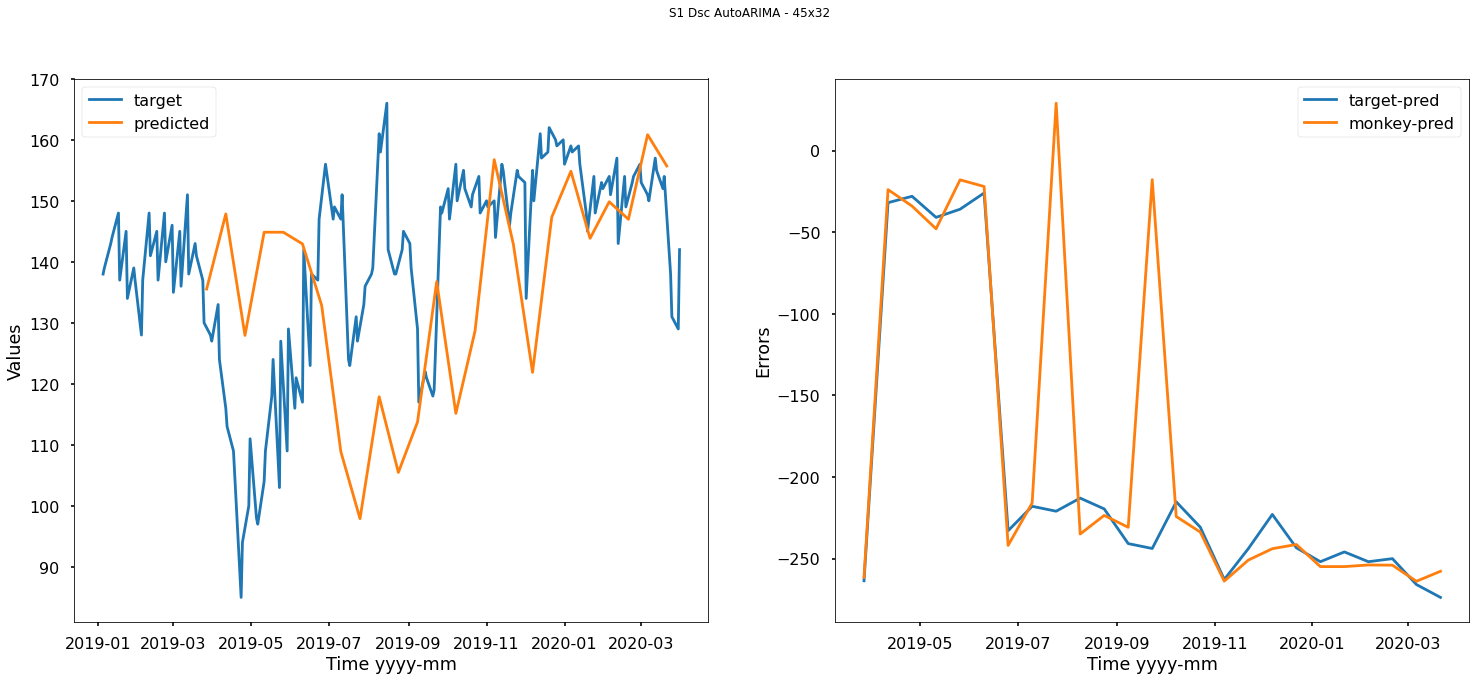

In [23]:
df = df4532[df4532['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
fig.suptitle('S1 Dsc AutoARIMA - 45x32')
ax1.set_xlabel('Time yyyy-mm')
ax1.set_ylabel('Errors')
ax1.legend()
plt.show()
plt.close()

In [24]:
arr = np.load('./s1dsc_2516.npy', allow_pickle=True)
arr = pd.DataFrame(arr)

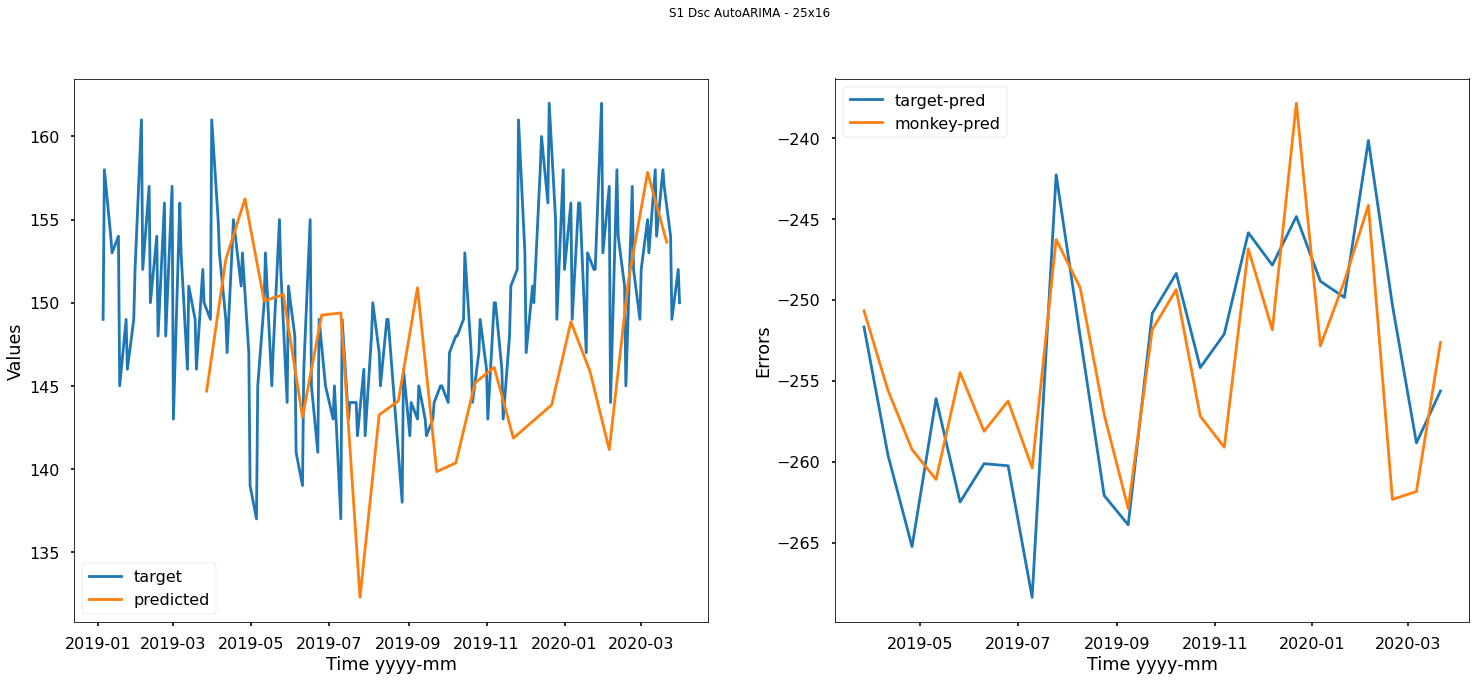

In [25]:
df = df2516[df2516['ds']<pd.to_datetime('2020-04-01')]
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(25,10))
fig.suptitle('S1 Dsc AutoARIMA - 25x16')
ax0.plot(df['ds'],df['y'], label = 'target')
ax0.plot(arr[0], arr[1], label ='predicted')
ax0.set_xlabel('Time yyyy-mm')
ax0.set_ylabel('Values')
ax0.legend()
target = []
for date in arr[0]:
    temp = df[df['ds']>=date]
    target.append(temp.iloc[0])
target = pd.DataFrame(target)
err = np.array(target['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='target-pred')
monkey = []
for date in arr[0]:
    temp = df[df['ds']<date]
    monkey.append(temp.iloc[-1])
monkey = pd.DataFrame(monkey)
err = np.array(monkey['y'])-np.array(arr[1])
ax1.plot(arr[0], err, label ='monkey-pred')
ax1.set_xlabel('Time yyyy-mm')
ax1.set_ylabel('Errors')
ax1.legend()
plt.show()
plt.close()